# Tumor Class Prediction (SVM  Project)

Using SVM(Support vector machine) to build and train a model using human cell records, and classify cells to whether the samples are:

Class 2 : benign(mild state)

Class 4 : maligant(evil state)

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# About the cell  data

The data set conatain several hundreds human cell samples records, each of which contains the values of set of cell characteristics.

The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Source of data - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=list] 


In [ ]:
df=pd.read_csv(r'C:\Users\abc\Downloads\cell_samples.csv')
df.head()

# Dataset Infomation

In [ ]:
df.info()

In [4]:
df.shape

(699, 11)

In [5]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

# Distribution of the target classes

2    458
4    241
Name: Class, dtype: int64

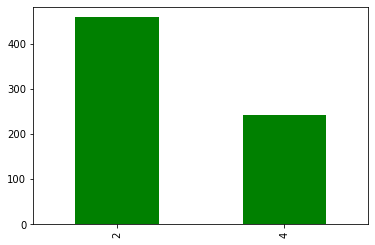

In [6]:
df.Class.value_counts().plot(kind='bar',color='g')
df.Class.value_counts()

# Data cleaning and selection

In [7]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
df=df[pd.to_numeric(df.BareNuc,errors='coerce').notnull()]
df.BareNuc=df.BareNuc.astype('int')     #changing dtype of BareNuc to int

In [9]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
df=df.drop('ID',axis=1)      #ID is not effecting our classes
df.head()  

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
X= df.iloc[:,:-1].values     #feature data
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [12]:
y= df.iloc[:,9].values      #target data
y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

# train/test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=5)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [15]:
X_train.size,X_test.size,y_train.size,y_test.size

(4914, 1233, 546, 137)

In [16]:
y_test

array([2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2], dtype=int64)

# Modeling

In [17]:
classifier=svm.SVC(C=0.1,gamma=0.01,kernel ='rbf')
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

# Evaluation

In [18]:
print(classification_report(y_test,y_predict))        
print(confusion_matrix(y_test,y_predict))



              precision    recall  f1-score   support

           2       0.99      0.99      0.99        90
           4       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

[[89  1]
 [ 1 46]]


In [19]:
#accuracy
A=accuracy_score(y_predict,y_test)
Ac=(float("{:.6f}".format(A)))*100
print('Accuracy:',Ac)

Accuracy: 98.5401


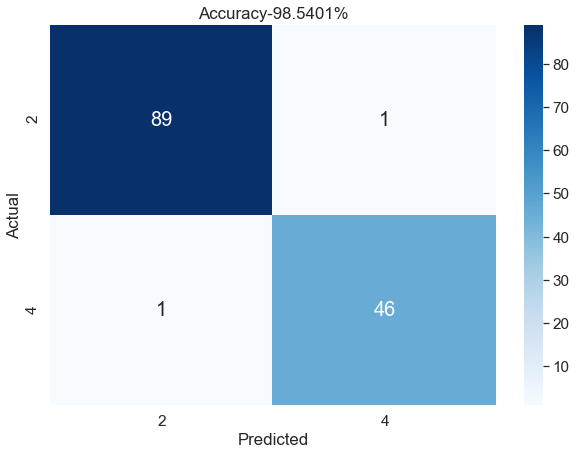

In [20]:
#visuallizing confusion_matrix

data = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(data, columns=np.unique(y_predict), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))

sns.set(font_scale=1.4) #for label size
plt.title(f'Accuracy-{Ac}%')
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20},fmt="d")


#Class 2 : benign
#Class 4 : maligant

# Model is making 2 incorrect classfications.